# Time Series

In [23]:
from pandas import read_excel
from matplotlib import pyplot as plt
import numpy as np

Australian monthly electricity production, displays a clear trend and
seasonality

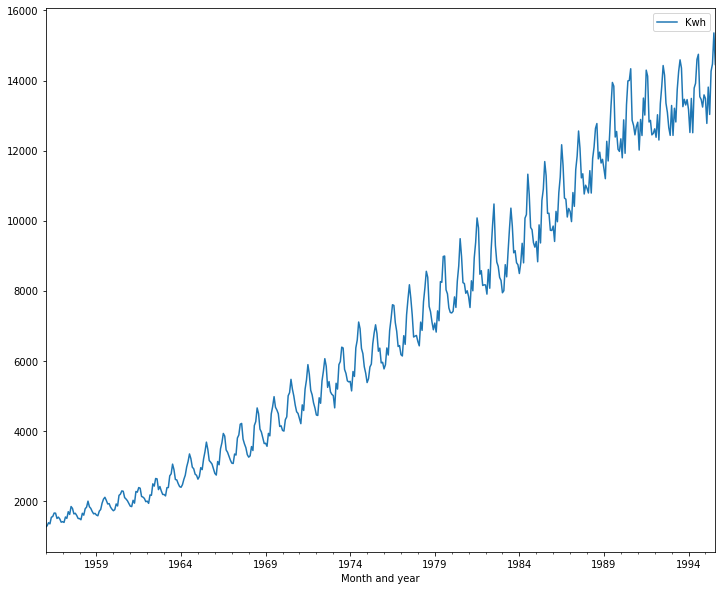

In [18]:
fig, ax = plt.subplots(figsize=(12,10))
series = read_excel('Electricity.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
series.plot(ax=ax)
plt.show()

<ipython-input-37-4e3265e97293>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('Electricity.xls', sheet_name='SeasData', header=0, index_col=0, parse_dates=True)


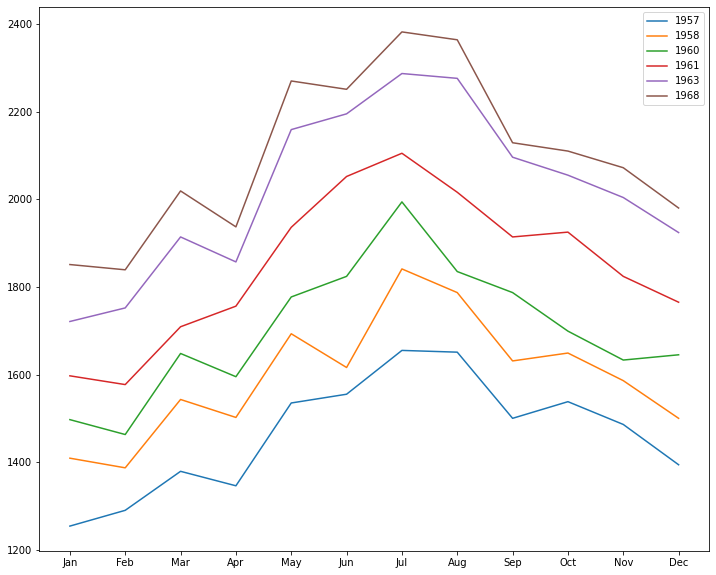

In [37]:
series = read_excel('Electricity.xls', sheet_name='SeasData', header=0, index_col=0, parse_dates=True)
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(12,10))
for column in series.columns:
    plt.plot(x, series[column])

plt.xticks(x, months)
years = [1957,1958, 1960, 1961, 1963, 1968]
plt.legend(years)

plt.show()

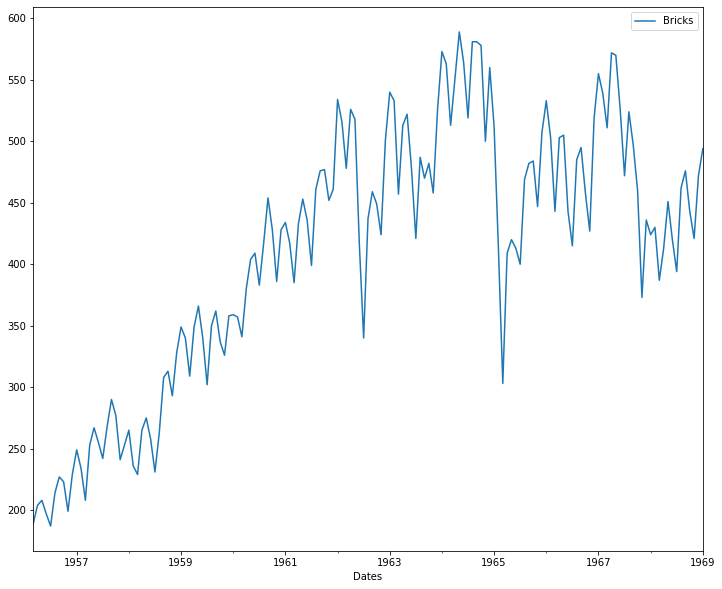

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
series = read_excel('ClayBricks.xls', sheet_name='BRICKSQ', header=0, index_col=0, parse_dates=True)
series.plot(ax=ax)
plt.show()

Australian clay brick production contains occasional large fluctuations which
are difficult to explain, and hence predict, without knowing the underlying causes

<ipython-input-35-104ea269e2f7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('ClayBricks.xls',  sheet_name='SeasonalData', header=0, index_col=0, parse_dates=True)


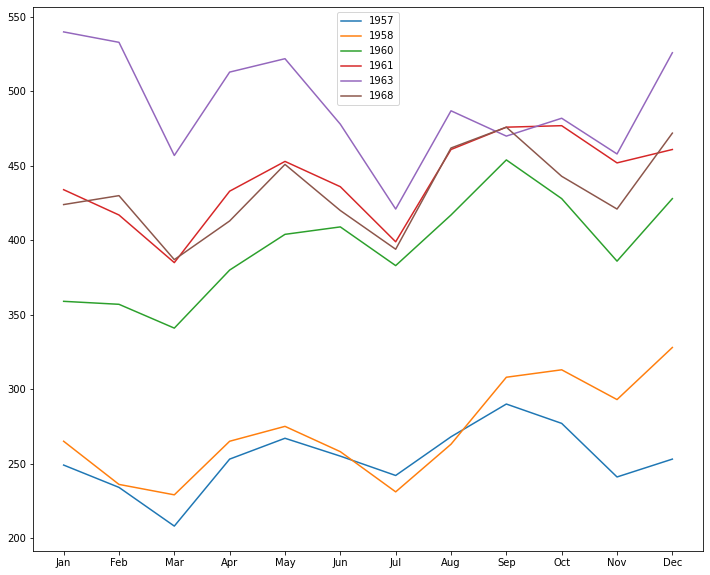

In [35]:
series = read_excel('ClayBricks.xls',  sheet_name='SeasonalData', header=0, index_col=0, parse_dates=True)
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(12,10))
for column in series.columns:
    plt.plot(x, series[column])

plt.xticks(x, months)
years = [1957,1958, 1960, 1961, 1963, 1968]
plt.legend(years)

plt.show()

# Correlation
$Cov_{XY} = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$

$Cov_{XY}$ represents the covariance between X and Y.
n is the number of observations.
$X_i$ and $Y_i$ are the individual observations of X and Y, respectively.
$\bar{X}$ and $\bar{Y}$ are the means of X and Y, respectively.
The sum is taken over all n observations.

$r_{XY} = \frac{Cov_{XY}}{S_X S_Y} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}}$
n is the number of observations.
Xi​ and Yi​ are the individual observations of X and Y, respectively.
Xˉ and Yˉ are the means of X and Y, respectively.
$S_X$ and SY​ are the standard deviations of X and Y, respectively.
The sum is taken over all n observations.


In [43]:
series1 = read_excel('JapaneseCars.xls', sheet_name='Data', usecols = [0], header=0,
                      dtype=float)
series2 = read_excel('JapaneseCars.xls', sheet_name='Data', usecols=[1], header=0,
                      dtype=float)
correlval=np.corrcoef(series1, series2)
correlval=correlval[1,0]
print(correlval)

/home/shahid/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/shahid/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/shahid/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
